# TAREA 4

## Filtro SelectKBest

Importamos las librerías a utilizar:

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif

### Leer datos

Leemos los datos y quitamos la columna que sabemos está vacía

In [2]:
archivo = "/content/todos_datos.xlsx"

data= pd.read_excel(archivo)

data.pop("EMISIONES(sin 3B y 3D)(Gg en CO2e)")
data

,Año,Categoria,Fuente,Subfuente1,Subfuente2,Subfuente3,CO2,CH4,N2O,HFC-23,...,CF4,C2F6,C3F8,C4F6,c-C4F8,C5F8,NF3,SF6,EMISIONES_NETAS(Gg en CO2e),Carbono_negro(Gg)
0,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de elect...,-,70302.750576,62.745182,139.850236,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70505.345994,11.656345
1,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1b] Refinación del petróleo,-,11550.924752,11.131438,20.203821,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11582.260011,2.190852
2,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1c] Manufactura de combustibles sólidos y o...,-,25911.446413,18.174816,27.485844,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25957.107072,0.305281
3,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,-,5050.957286,3.683582,5.648170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5060.289038,0.122834
4,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A2] Industrias manufactura y de la construcción,[1A2b] Metales no ferrosos,-,2105.775916,1.876280,2.920578,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110.572775,0.038763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,2021,[4] Residuos,[4C] Incineración y quema a cielo abierto de ...,[4C1] Incineración de residuos peligrosos indu...,-,-,28.597444,0.041421,0.762761,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.401625,NaN
4124,2021,[4] Residuos,[4C] Incineración y quema a cielo abierto de ...,[4C2] Quema a cielo abierto de residuos sólidos,-,-,1705.641772,754.454674,164.777875,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2624.874321,1.435000
4125,2021,[4] Residuos,[4D] Tratamiento y eliminación de aguas residu...,[4D1] Tratamiento y eliminación de aguas resid...,-,-,NaN,4930.620916,2781.021175,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7711.642091,NaN
4126,2021,[4] Residuos,[4D] Tratamiento y eliminación de aguas residu...,[4D2] Tratamiento y eliminación de aguas resid...,-,-,NaN,20874.261433,2790.491065,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23664.752498,NaN


### Transformación de datos

Un ejercició interesanete sería evaluar ANOVA de valor F de los datos separados por categoría para saber cuáles son las varíables que tienen más significancia para cada una de ellas.

Para esto separamos los datos en cada una de las 4 categorías originales:

In [6]:
data_year_categ =data.groupby(['Año','Categoria']).sum()

data_year_categ

<ipython-input-6-f89f6ea40434>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_year_categ =data.groupby(['Año','Categoria']).sum()


CO2  \
Año  Categoria                                                           
1990 [1] Energía                                         287887.540936   
     [2] Procesos industriales y uso de productos         30144.818918   
     [3] Agricultura, silvicultura y otros usos de l...    1564.992722   
     [4] Residuos                                           402.492892   
1991 [1] Energía                                         298614.786510   
...                                                                ...   
2020 [4] Residuos                                          1683.191987   
2021 [1] Energía                                         406590.103709   
     [2] Procesos industriales y uso de productos         46413.119395   
     [3] Agricultura, silvicultura y otros usos de l...    1528.414121   
     [4] Residuos                                          1734.239216   

                                                                   CH4  \
Año  Categoria                                                           
1990 [1] Energía                                          15757.714204   
     [2] Procesos industriales y uso de productos           257.953577   
     [3] Agricultura, silvicultura y otros usos de l...   91145.253066   
     [4] Residuos                                         10679.499256   
1991 [1] Energía                                          16023.514488   
...                                                                ...   
2020 [4] Residuos                                         54406.703364   
2021 [1] Energía                                          35931.736765   
     [2] Procesos industriales y uso de productos           181.152039   
     [3] Agricultura, silvicultura y otros usos de l...  105666.029633   
     [4] Residuos                                         56262.696073   

                                                                  N2O  \
Año  Categoria                                                          
1990 [1] Energía                                          2897.297385   
     [2] Procesos industriales y uso de productos          872.910000   
     [3] Agricultura, silvicultura y otros usos de l...  20911.772279   
     [4] Residuos                                         3665.111658   
1991 [1] Energía                                          3024.491720   
...                                                               ...   
2020 [4] Residuos                                         6927.661624   
2021 [1] Energía                                          2070.603382   
     [2] Procesos industriales y uso de productos          560.591947   
     [3] Agricultura, silvicultura y otros usos de l...  27863.631753   
     [4] Residuos                                         5820.802048   

                                                              HFC-23  \
Año  Categoria                                                         
1990 [1] Energía                                            0.000000   
     [2] Procesos industriales y uso de productos         760.635840   
     [3] Agricultura, silvicultura y otros usos de l...     0.000000   
     [4] Residuos                                           0.000000   
1991 [1] Energía                                            0.000000   
...                                                              ...   
2020 [4] Residuos                                           0.000000   
2021 [1] Energía                                            0.000000   
     [2] Procesos industriales y uso de productos        1974.597954   
     [3] Agricultura, silvicultura y otros usos de l...     0.000000   
     [4] Residuos                                           0.000000   

                                                           HFC-410A  \
Año  Categoria                                                        
1990 [1] Energía                                            0.00000   
     [2] Procesos industriales y uso de p

In [7]:
data_year_categ = data_year_categ.sort_values(by=['Categoria','Año'])

In [8]:
data_year_categ

,,CO2,CH4,N2O,HFC-23,HFC-410A,HFC-43-10mee,HFC-125,HFC-134,HFC-134a,HFC-404A,...,CF4,C2F6,C3F8,C4F6,c-C4F8,C5F8,NF3,SF6,EMISIONES_NETAS(Gg en CO2e),Carbono_negro(Gg)
Año,Categoria,,,,,,,,,,,,,,,,,,,,,
1990,[1] Energía,287887.540936,15757.714204,2897.297385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,306542.552525,73.109323
1991,[1] Energía,298614.786510,16023.514488,3024.491720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317662.792718,74.688359
1992,[1] Energía,299915.893251,16005.650554,3049.539674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318971.083479,76.234204
1993,[1] Energía,301303.624003,16892.611398,3097.756590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,321293.991991,76.964546
1994,[1] Energía,321255.043482,16871.521900,3217.366806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,341343.932187,80.003540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,[4] Residuos,1124.461871,48316.148007,2460.948380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51901.558259,1.656748
2018,[4] Residuos,1060.667783,49467.466733,2441.687261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52969.821778,1.590980
2019,[4] Residuos,1037.908596,50464.117117,2755.523401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54257.549114,1.538008


In [9]:
categ1 = data_year_categ.iloc[0:32,:]
categ2 = data_year_categ.iloc[32:64,:]
categ3 = data_year_categ.iloc[64:96,:]
categ4 = data_year_categ.iloc[96:128,:]

### ANOVA valor F para cada categoría

Obtenemos las *x's* y *y's* para cada categoría:

In [10]:
x1 = categ1.iloc[:,0:27]
x2 = categ2.iloc[:,0:27]
x3 = categ3.iloc[:,0:27]
x4 = categ4.iloc[:,0:27]
xt = data_year_categ.iloc[:,0:27]

In [11]:
y1 = categ1.iloc[:,27]
y2 = categ2.iloc[:,27]
y3 = categ3.iloc[:,27]
y4 = categ4.iloc[:,27]
yt = data_year_categ.iloc[:,27]

Hacemos las regresiones f:

In [12]:
f_value1 = f_regression(x1,y1)
f_value2 = f_regression(x2,y2)
f_value3 = f_regression(x3,y3)
f_value4 = f_regression(x4,y4)
f_valuet = f_regression(xt,yt)

Imprimimos los resultados:

In [13]:
df_results = pd.DataFrame(f_valuet[0], index=xt.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
CO2,2922.740185
N2O,24.794267
CH4,9.744458
HFC-23,5.547116
SF6,3.655345
CF4,3.088447
C2F6,2.925548
HFC-32,2.914260
C5F8,2.835142
C3F8,2.835142


In [14]:
df_results = pd.DataFrame(f_value1[0], index=x1.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
CO2,2757.876362
CH4,15.525234
N2O,0.006604
HFC-365mfc/227ea,0.000000
NF3,0.000000
C5F8,0.000000
c-C4F8,0.000000
C4F6,0.000000
C3F8,0.000000
C2F6,0.000000


In [15]:
df_results = pd.DataFrame(f_value2[0], index=x2.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
HFC-32,280.720557
C5F8,214.357948
C4F6,214.357948
C3F8,214.357948
c-C4F8,214.317353
NF3,202.599206
HFC-134a,180.696935
CO2,111.024138
HFC-404A,91.973996
HFC-407C,67.607062


In [16]:
df_results = pd.DataFrame(f_value3[0], index=x3.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
CO2,2907.460011
N2O,14.111747
CH4,0.528674
HFC-365mfc/227ea,0.000000
NF3,0.000000
C5F8,0.000000
c-C4F8,0.000000
C4F6,0.000000
C3F8,0.000000
C2F6,0.000000


In [17]:
df_results = pd.DataFrame(f_value4[0], index=x4.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
CH4,5853.587911
CO2,244.465036
N2O,0.010300
HFC-365mfc/227ea,0.000000
NF3,0.000000
C5F8,0.000000
c-C4F8,0.000000
C4F6,0.000000
C3F8,0.000000
C2F6,0.000000


Parece ser que muchas de las variables son solo significativas para las emisiones de la categoría 2.

## Selección de características más relevantes

Podemos realizar un análisis general de la correlación de las varaiables con la emisión total.

Se usará:
* ANOVA de valor F
* Valor R de correlación
* Umbral de varianza

### Preparación de datos

Para utilizar los datos convertimos las variables nan a ceros indicando una emisión nula:

In [48]:
data_num_ceros= data.copy()

for i in range(0,len(data_num_ceros.iloc[:,1])):
  for j in range(6,len(data_num_ceros.columns)):
    #aux = data_num_ceros.iloc[i,j].item()
    if np.isnan(data_num_ceros.iloc[i,j]) == True:
      data_num_ceros.iloc[i,j] = 0


data_num_ceros

,Año,Categoria,Fuente,Subfuente1,Subfuente2,Subfuente3,CO2,CH4,N2O,HFC-23,...,CF4,C2F6,C3F8,C4F6,c-C4F8,C5F8,NF3,SF6,EMISIONES_NETAS(Gg en CO2e),Carbono_negro(Gg)
0,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de elect...,-,70302.750576,62.745182,139.850236,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70505.345994,11.656345
1,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1b] Refinación del petróleo,-,11550.924752,11.131438,20.203821,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11582.260011,2.190852
2,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1c] Manufactura de combustibles sólidos y o...,-,25911.446413,18.174816,27.485844,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25957.107072,0.305281
3,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,-,5050.957286,3.683582,5.648170,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5060.289038,0.122834
4,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A2] Industrias manufactura y de la construcción,[1A2b] Metales no ferrosos,-,2105.775916,1.876280,2.920578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2110.572775,0.038763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,2021,[4] Residuos,[4C] Incineración y quema a cielo abierto de ...,[4C1] Incineración de residuos peligrosos indu...,-,-,28.597444,0.041421,0.762761,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.401625,0.000000
4124,2021,[4] Residuos,[4C] Incineración y quema a cielo abierto de ...,[4C2] Quema a cielo abierto de residuos sólidos,-,-,1705.641772,754.454674,164.777875,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2624.874321,1.435000
4125,2021,[4] Residuos,[4D] Tratamiento y eliminación de aguas residu...,[4D1] Tratamiento y eliminación de aguas resid...,-,-,0.000000,4930.620916,2781.021175,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7711.642091,0.000000
4126,2021,[4] Residuos,[4D] Tratamiento y eliminación de aguas residu...,[4D2] Tratamiento y eliminación de aguas resid...,-,-,0.000000,20874.261433,2790.491065,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23664.752498,0.000000


### ANOVA de valor F

Asignamos las variables *x* como todos los tipos de gases y la variable *y* como el total de emisiones. Posetriormente se realiza la regresión f:

In [49]:
x = data_num_ceros.iloc[:,6:33]
y = data_num_ceros.iloc[:,33]
f_value = f_regression(x,y)

In [70]:
f_value

(array([4.02725104e+04, 3.79296568e+02, 6.97837770e+01, 2.76326136e-01,
        2.89789922e+00, 2.43862821e-01, 2.44992597e-01, 5.76614413e-02,
        2.73414350e+00, 3.19232889e+00, 3.25916612e+00, 1.89056761e-01,
        5.12907576e-02, 2.56487008e-01, 1.51519898e-01, 8.84085970e-02,
        3.03060554e-01, 3.04742361e+00, 6.29393704e-01, 3.20514725e-01,
        2.97194681e-01, 6.16804314e-01, 6.16804314e-01, 6.17805062e-01,
        6.16804314e-01, 6.98790950e-01, 6.39633117e-01]),
 array([0.00000000e+00, 6.85221281e-81, 8.93368428e-17, 5.99147620e-01,
        8.87704032e-02, 6.21456283e-01, 6.20649581e-01, 8.10242982e-01,
        9.83002232e-02, 7.40579352e-02, 7.10981011e-02, 6.63725569e-01,
        8.20843508e-01, 6.12571026e-01, 6.97107188e-01, 7.66225096e-01,
        5.81999862e-01, 8.09397617e-02, 4.27623413e-01, 5.71329268e-01,
        5.85675939e-01, 4.32282402e-01, 4.32282402e-01, 4.31909246e-01,
        4.32282402e-01, 4.03238657e-01, 4.23889723e-01]))

Para facilitar la visualización de los resultados podemos crear un dataframe de resultados:

In [107]:
resultados = pd.DataFrame(f_value[0], index=x.columns)
resultados.columns = ['f_value']
resultados.sort_values('f_value', inplace = True, ascending = False)
resultados

,f_value
CO2,40272.510412
CH4,379.296568
N2O,69.783777
HFC-407C,3.259166
HFC-404A,3.192329
HFC-245fa,3.047424
HFC-410A,2.897899
HFC-134a,2.734144
NF3,0.698791
SF6,0.639633


También se puede crear una columna con los resultados basados en el p-valor:

In [108]:
resultados['f_value_pvalue'] = f_value[1]
resultados

,f_value,f_value_pvalue
CO2,40272.510412,0.000000e+00
CH4,379.296568,6.852213e-81
N2O,69.783777,8.933684e-17
HFC-407C,3.259166,5.991476e-01
HFC-404A,3.192329,8.877040e-02
HFC-245fa,3.047424,6.214563e-01
HFC-410A,2.897899,6.206496e-01
HFC-134a,2.734144,8.102430e-01
NF3,0.698791,9.830022e-02
SF6,0.639633,7.405794e-02


Para facilitar la interpretación sustituimos los valores con los resultados de las pruebas:

In [109]:
for i in range(0,len(f_value[1])):
    if resultados.iloc[i,1] <= 0.05:
        resultados.iloc[i,1] = 1
    else:
        resultados.iloc[i,1] = 0

In [110]:
resultados

,f_value,f_value_pvalue
CO2,40272.510412,1.0
CH4,379.296568,1.0
N2O,69.783777,1.0
HFC-407C,3.259166,0.0
HFC-404A,3.192329,0.0
HFC-245fa,3.047424,0.0
HFC-410A,2.897899,0.0
HFC-134a,2.734144,0.0
NF3,0.698791,0.0
SF6,0.639633,0.0


Basandonos en los resultados de esta prueba las variables *CO2*, *CH4* y *N2O* parecen ser las que aportan la información más significativa.

Podemos visualizar esto en una gráfica:

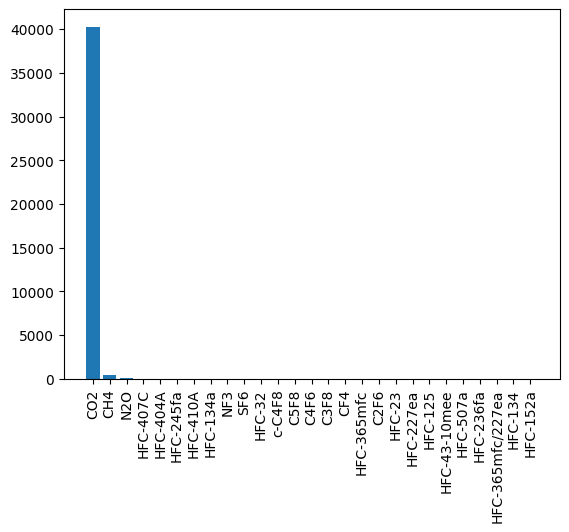

In [111]:
plt.figure()
plt.bar(resultados.index, resultados.f_value)
plt.xticks(rotation = 90)
plt.show()

### Correlación de valor R

Realizamos la regresión r usando las mismas variables *x* y *y*:

In [52]:
from sklearn.feature_selection import r_regression

In [53]:
r_value = r_regression(x, y)
r_value

array([ 0.95240168,  0.29015347,  0.12896465, -0.00818336,  0.0264926 ,
       -0.00768768, -0.00770547, -0.00373831,  0.0257337 ,  0.02780489,
        0.02809423, -0.00676895, -0.00352576, -0.00788414, -0.00605986,
       -0.0046289 , -0.00857007,  0.02716699, -0.0123499 , -0.00881338,
       -0.00848673, -0.01222578, -0.01222578, -0.01223569, -0.01222578,
       -0.01301284, -0.01244994])

Agregamos los resultados al dataframe de resultados:

In [121]:
resultados['r_value'] = r_value
resultados

,f_value,f_value_pvalue,r_value
CO2,40272.510412,1.0,0.952402
CH4,379.296568,1.0,0.290153
N2O,69.783777,1.0,0.128965
HFC-407C,3.259166,0.0,-0.008183
HFC-404A,3.192329,0.0,0.026493
HFC-245fa,3.047424,0.0,-0.007688
HFC-410A,2.897899,0.0,-0.007705
HFC-134a,2.734144,0.0,-0.003738
NF3,0.698791,0.0,0.025734
SF6,0.639633,0.0,0.027805


Para evitar confusiones podemos usar el valor absoluto:

In [122]:
resultados['r_value_abs'] = resultados['r_value'].abs()
resultados.sort_values('r_value_abs', inplace = True, ascending = False)
resultados

,f_value,f_value_pvalue,r_value,r_value_abs
CO2,40272.510412,1.0,0.952402,0.952402
CH4,379.296568,1.0,0.290153,0.290153
N2O,69.783777,1.0,0.128965,0.128965
HFC-32,0.629394,0.0,0.028094,0.028094
SF6,0.639633,0.0,0.027805,0.027805
C2F6,0.297195,0.0,0.027167,0.027167
HFC-404A,3.192329,0.0,0.026493,0.026493
NF3,0.698791,0.0,0.025734,0.025734
HFC-134,0.057661,0.0,-0.013013,0.013013
HFC-152a,0.051291,0.0,-0.012450,0.012450


Una vez más las variables que parecen ser más sigificativas o con mayor correlación son *CO2*, *CH4* y *N2O*.

Podemos observarlo en una gráfica:

In [124]:
colors = []
for i in resultados['r_value']:
    if i > 0:
        colors.append('b')
    else:
        colors.append('r')

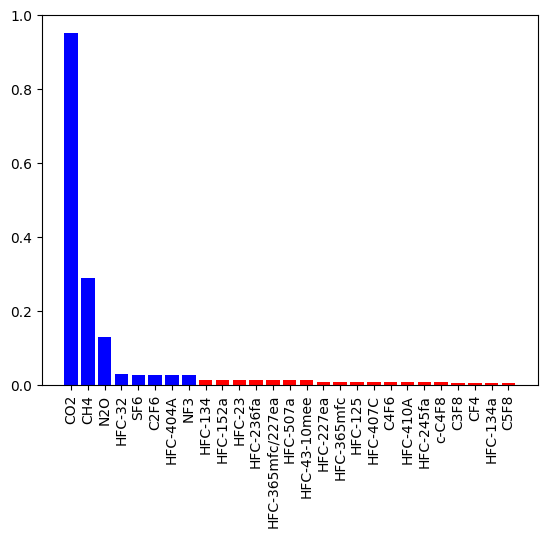

In [125]:
plt.figure()
plt.bar(resultados.index, resultados.r_value_abs, color = colors)
plt.xticks(rotation = 90)
plt.show()

### Umbral de varianza

In [128]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

Primero se preprocesan los datos usando un MinMaxScaler para que se encuentren todos en un rango del 0 a 1:

In [136]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled, columns = x.columns)
x_scaled

,CO2,CH4,N2O,HFC-23,HFC-410A,HFC-43-10mee,HFC-125,HFC-134,HFC-134a,HFC-404A,...,HFC-245fa,HFC-32,CF4,C2F6,C3F8,C4F6,c-C4F8,C5F8,NF3,SF6
0,0.724916,7.811268e-04,0.006433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.565290,1.385774e-04,0.000929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.604307,2.262618e-04,0.001264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.547629,4.585762e-05,0.000260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.539628,2.335817e-05,0.000134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.533984,5.156536e-07,0.000035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4124,0.538540,9.392351e-03,0.007579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4125,0.533906,6.138224e-02,0.127920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4126,0.533906,2.598677e-01,0.128356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se obtiene entonces el umbral de varianza usando las x transformadas:

In [137]:
selector = VarianceThreshold()
selector.fit_transform(x_scaled)
selector.variances_

array([0.00329623, 0.00663614, 0.00405904, 0.0019573 , 0.00086763,
       0.00078531, 0.00119848, 0.00030118, 0.00191186, 0.00204149,
       0.00157435, 0.00118447, 0.00040963, 0.00120949, 0.00083509,
       0.00054543, 0.00167427, 0.00154987, 0.00218401, 0.00134697,
       0.00134257, 0.00154727, 0.00154727, 0.00154726, 0.00154727,
       0.0015621 , 0.00103382])

Se agregan a el dataframe de resultados:

In [138]:
resultados['variance'] = selector.variances_
resultados.sort_values('variance', ascending = False, inplace = True)
resultados

,f_value,f_value_pvalue,r_value,r_value_abs,variance
CH4,379.296568,1.0,0.290153,0.290153,0.006636
N2O,69.783777,1.0,0.128965,0.128965,0.004059
CO2,40272.510412,1.0,0.952402,0.952402,0.003296
HFC-407C,3.259166,0.0,-0.008183,0.008183,0.002184
HFC-152a,0.051291,0.0,-0.012450,0.012450,0.002041
HFC-32,0.629394,0.0,0.028094,0.028094,0.001957
HFC-134,0.057661,0.0,-0.013013,0.013013,0.001912
HFC-365mfc,0.303061,0.0,-0.008570,0.008570,0.001674
HFC-23,0.276326,0.0,-0.012350,0.012350,0.001574
HFC-134a,2.734144,0.0,-0.003738,0.003738,0.001562


De nuevo las variables que parecen ser más sigificativas o con mayor varianza son *CO2*, *CH4* y *N2O*.

Observando en una gráfica:

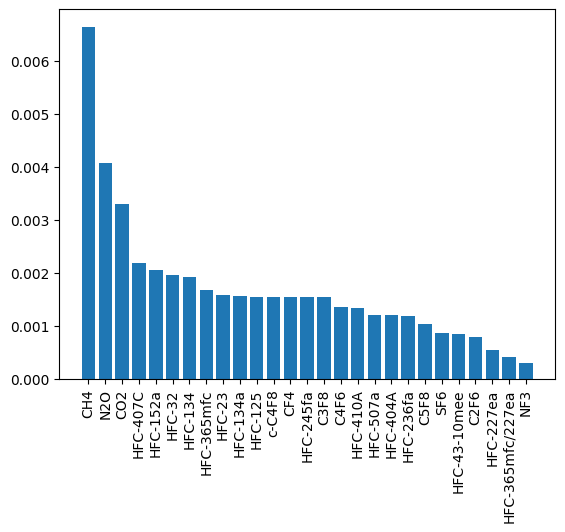

In [139]:
plt.figure()
plt.bar(resultados.index, resultados.variance)
plt.xticks(rotation = 90)
plt.show()

### Resultados

Analizamos el dataframe de resultados:

In [140]:
resultados

,f_value,f_value_pvalue,r_value,r_value_abs,variance
CH4,379.296568,1.0,0.290153,0.290153,0.006636
N2O,69.783777,1.0,0.128965,0.128965,0.004059
CO2,40272.510412,1.0,0.952402,0.952402,0.003296
HFC-407C,3.259166,0.0,-0.008183,0.008183,0.002184
HFC-152a,0.051291,0.0,-0.012450,0.012450,0.002041
HFC-32,0.629394,0.0,0.028094,0.028094,0.001957
HFC-134,0.057661,0.0,-0.013013,0.013013,0.001912
HFC-365mfc,0.303061,0.0,-0.008570,0.008570,0.001674
HFC-23,0.276326,0.0,-0.012350,0.012350,0.001574
HFC-134a,2.734144,0.0,-0.003738,0.003738,0.001562


Basandonós en los resultados las variables pertenecientes a los HFC y PFC son poco significativas probablemente debido a que son datos que provienen en su mayoría de una de las categorías.

Esto es consistente con otros estudios donde se omitieron este tipo de datos ya sea por falta de información o a consideración de expertos.

Se opta por unir estas variables en dos, una para cada tipo de gases, con el fin de simplificar e manejo de la información a la vez que se conserva la mayor cantidad de datos posibles.

## Bibliografía




* https://www.mdpi.com/2077-0472/13/7/1354
* https://zenodo.org/records/1228469